In [1]:
# importing libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve

#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.5.2

In [2]:
df = pd.read_csv('/content/Bank_Churn.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#Examine Data Shape
print("Data Shape:", df.shape)

Data Shape: (10000, 13)


In [4]:
#Check Data Types and Missing Values
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
#Identify Missing Values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
# Duplicate values
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [7]:
#Explore Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nValue Counts for Categorical Features:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Value Counts for Categorical Features:

Surname:
Surname
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Wells         1
Calzada       1
Gresswell     1
Aguirre       1
Morales       1
Name: count, Length: 2932, dtype: int64

Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [8]:
# 1. Convert 'Age' to integer
df['Age'] = np.round(df['Age']).astype(int)

# 2. Create 'Age_Group'
bins = [18, 25, 35, 45, 55, 65, np.inf]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [9]:
# 1. Convert 'Balance' to integer
df['Balance'] = np.round(df['Balance']).astype(int)

# 2. Create 'Balance_Group'
bins = [0,50000, 100000, 150000, 200000, 250000]
labels = ['0-50000', '50001-100000', '100001-150000', '150001-200000', '200001-250000']
df['Balance_Group'] = pd.cut(df['Balance'], bins=bins, labels=labels, right=False)

In [10]:
# 1. Convert 'CreditScore' to integer
df['CreditScore'] = np.round(df['CreditScore']).astype(int)

# 2. Create 'CreditScore_Group'
bins = [400, 500, 600, 700, 800, np.inf]
labels = ['400-500', '501-600', '601-700', '701-800', '800+']
df['CreditScore_Group'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)

In [11]:
# 1. Convert 'EstimatedSalary' to integer
df['EstimatedSalary'] = np.round(df['EstimatedSalary']).astype(int)

bins = [0, 25000, 50000, 75000, 100000, 125000, 150000,175000,200000]
labels = ['0-25000', '25001-50000', '50001-75000', '75001-100000', '100001-125000', '125001-150000','150001-175000','175001-200000']
df['EstimatedSalary_Group'] = pd.cut(df['EstimatedSalary'], bins=bins, labels=labels, right=False)

df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,Balance_Group,CreditScore_Group,EstimatedSalary_Group
0,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1,36-45,0-50000,601-700,100001-125000
1,15647311,Hill,608,Spain,Female,41,1,83808,1,0,1,112543,0,36-45,50001-100000,601-700,100001-125000
2,15619304,Onio,502,France,Female,42,8,159661,3,1,0,113932,1,36-45,150001-200000,501-600,100001-125000
3,15701354,Boni,699,France,Female,39,1,0,2,0,0,93827,0,36-45,0-50000,601-700,75001-100000
4,15737888,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084,0,36-45,100001-150000,800+,75001-100000


In [12]:
df.drop(['CustomerId','Surname','Age','EstimatedSalary','Balance','CreditScore'],inplace=True,axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Geography              10000 non-null  object  
 1   Gender                 10000 non-null  object  
 2   Tenure                 10000 non-null  int64   
 3   NumOfProducts          10000 non-null  int64   
 4   HasCrCard              10000 non-null  int64   
 5   IsActiveMember         10000 non-null  int64   
 6   Exited                 10000 non-null  int64   
 7   Age_Group              10000 non-null  category
 8   Balance_Group          9999 non-null   category
 9   CreditScore_Group      9981 non-null   category
 10  EstimatedSalary_Group  10000 non-null  category
dtypes: category(4), int64(5), object(2)
memory usage: 587.1+ KB


In [14]:
df.head()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Age_Group,Balance_Group,CreditScore_Group,EstimatedSalary_Group
0,France,Female,2,1,1,1,1,36-45,0-50000,601-700,100001-125000
1,Spain,Female,1,1,0,1,0,36-45,50001-100000,601-700,100001-125000
2,France,Female,8,3,1,0,1,36-45,150001-200000,501-600,100001-125000
3,France,Female,1,2,0,0,0,36-45,0-50000,601-700,75001-100000
4,Spain,Female,2,1,1,1,0,36-45,100001-150000,800+,75001-100000


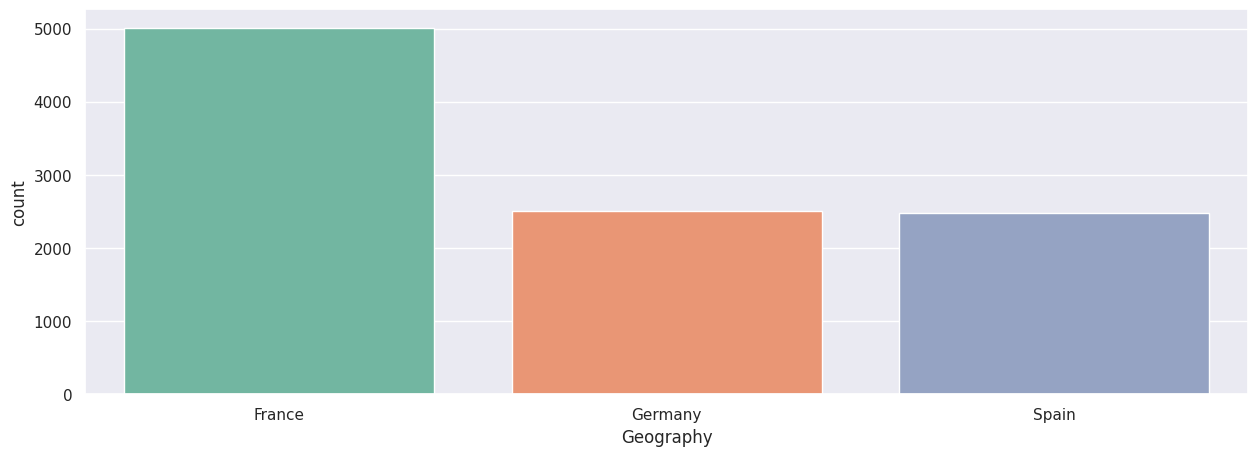

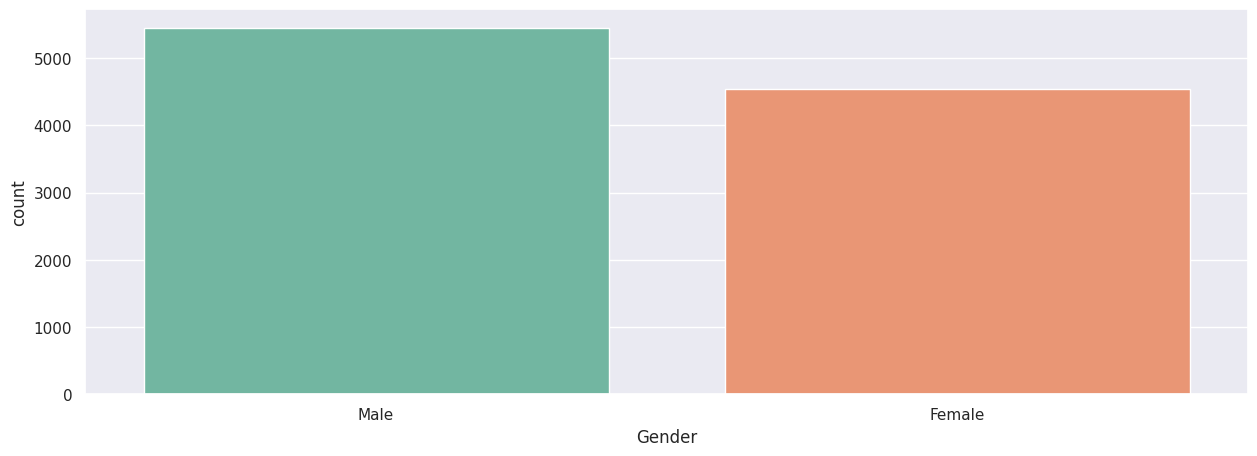

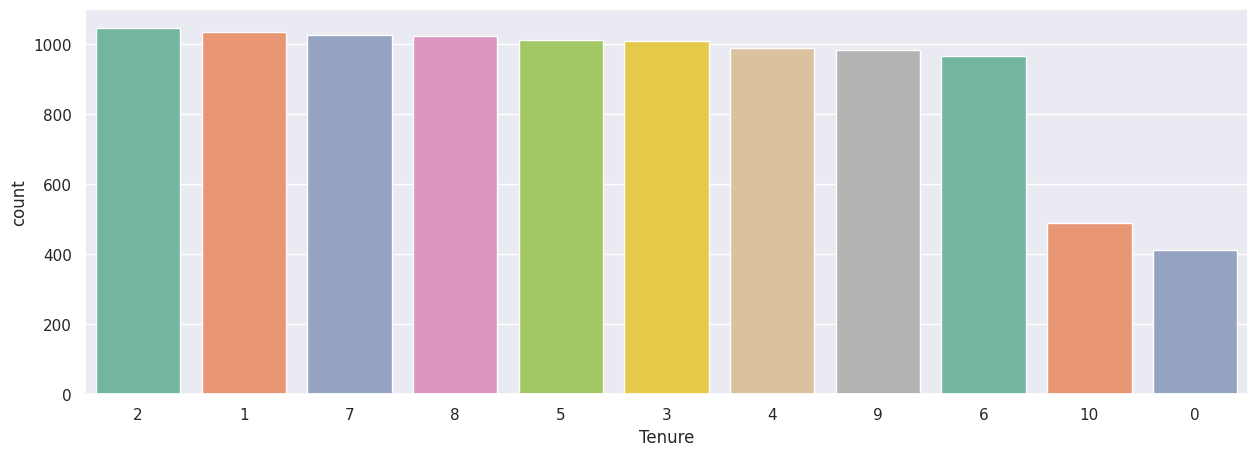

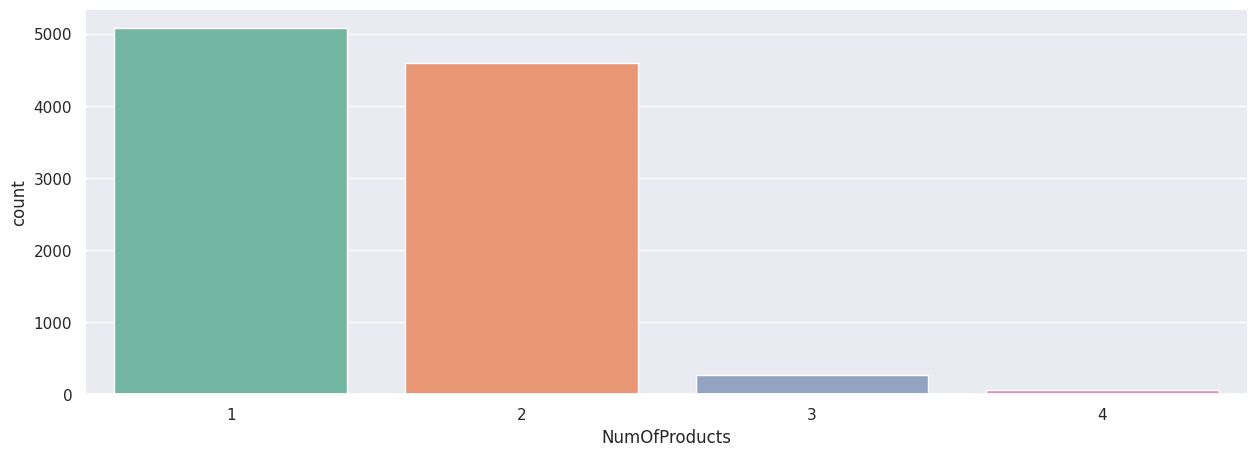

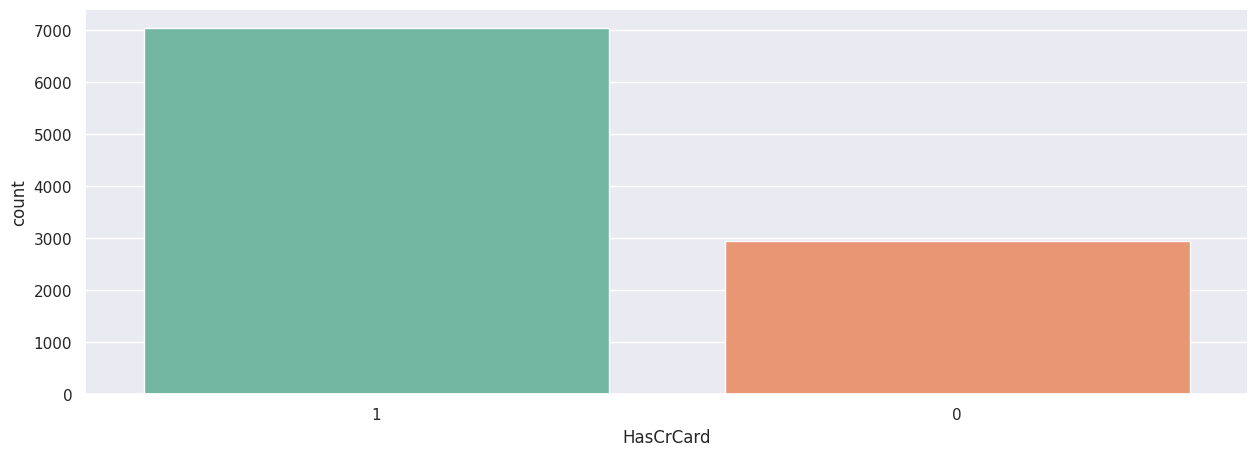

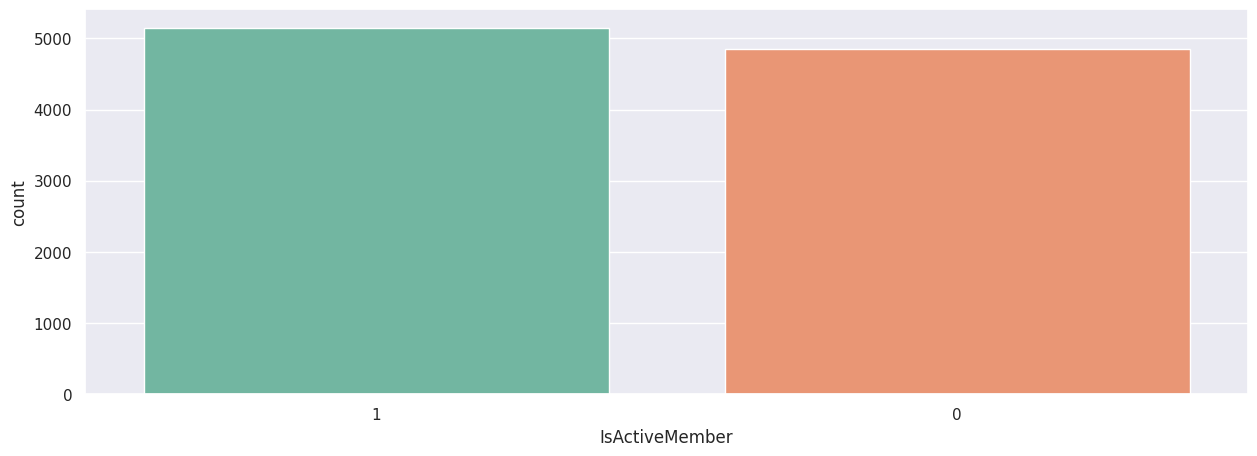

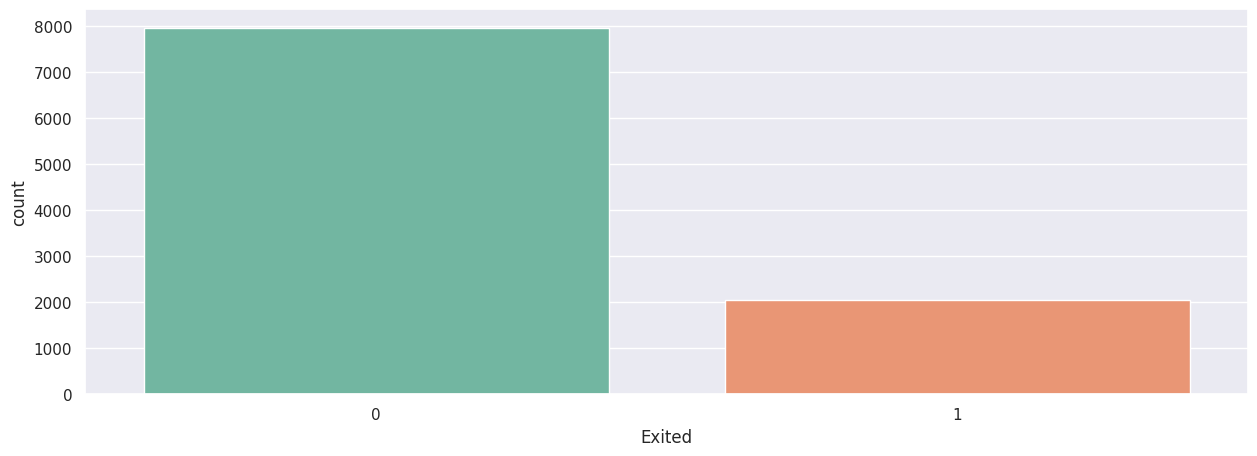

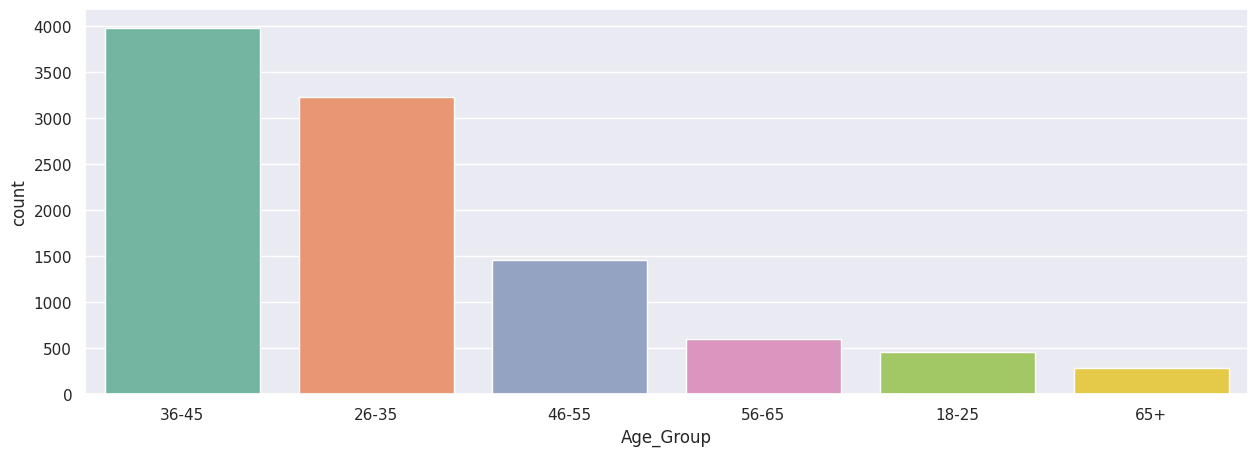

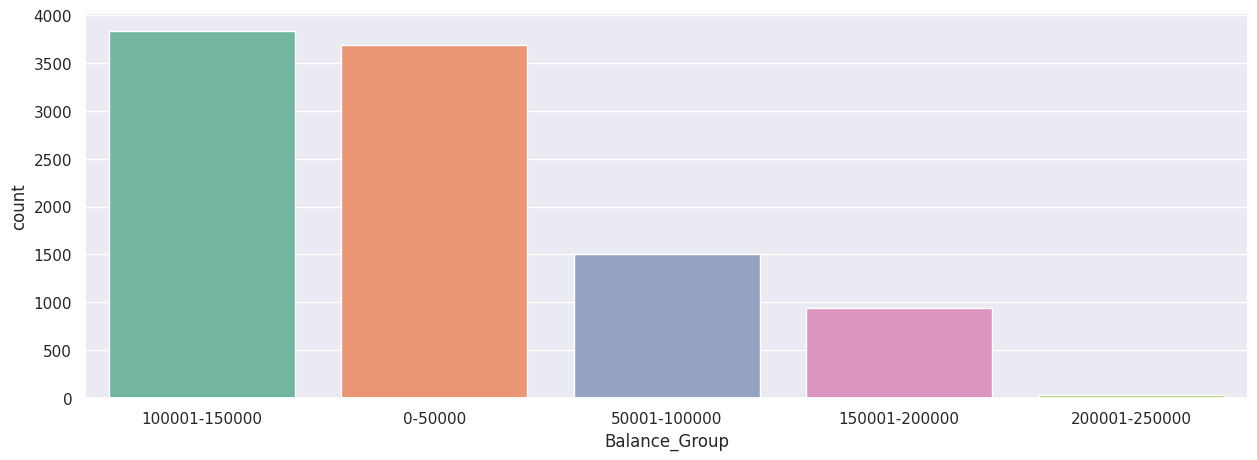

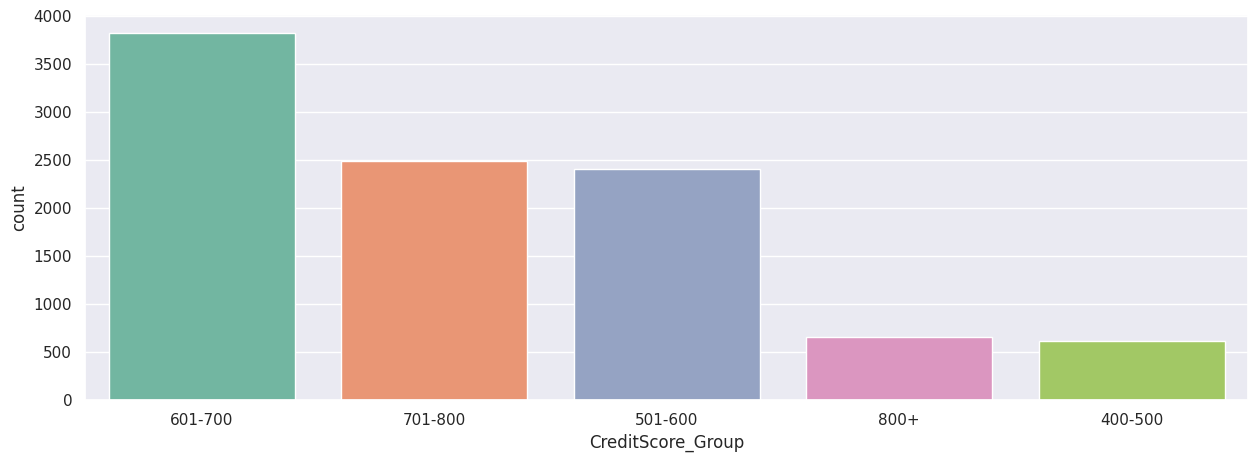

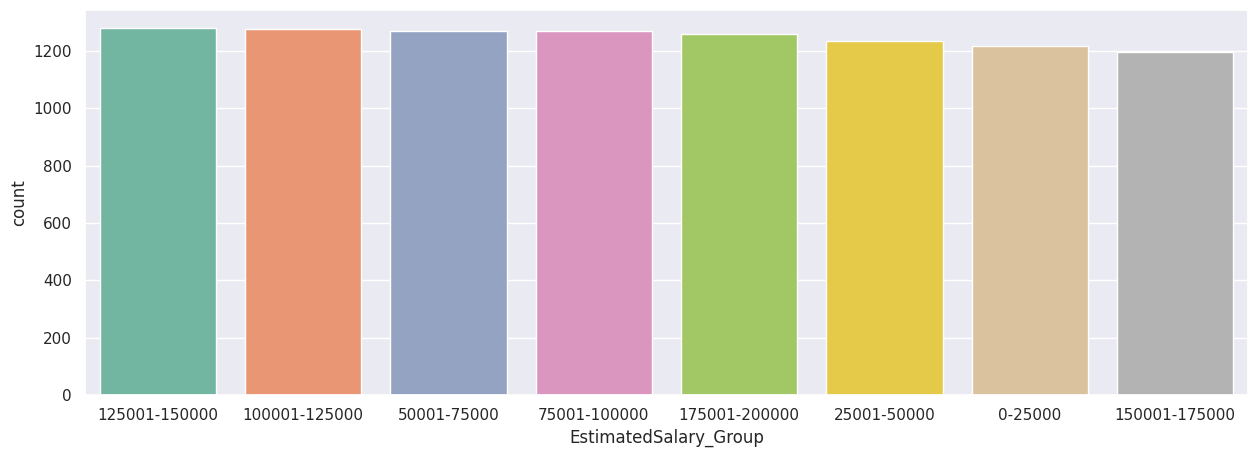

In [15]:
# Plotting for analysis
for i in df.columns:
  plt.figure(figsize=(15,5))
  sns.countplot(x = i , data = df,palette="Set2",order=df[i].value_counts(ascending=False).index)
  plt.xticks()
  plt.show()

           Exited  churned  stayed   %churned    %stayed
Geography                                               
France       5014      810    4204  16.154767  83.845233
Germany      2509      814    1695  32.443204  67.556796
Spain        2477      413    2064  16.673395  83.326605


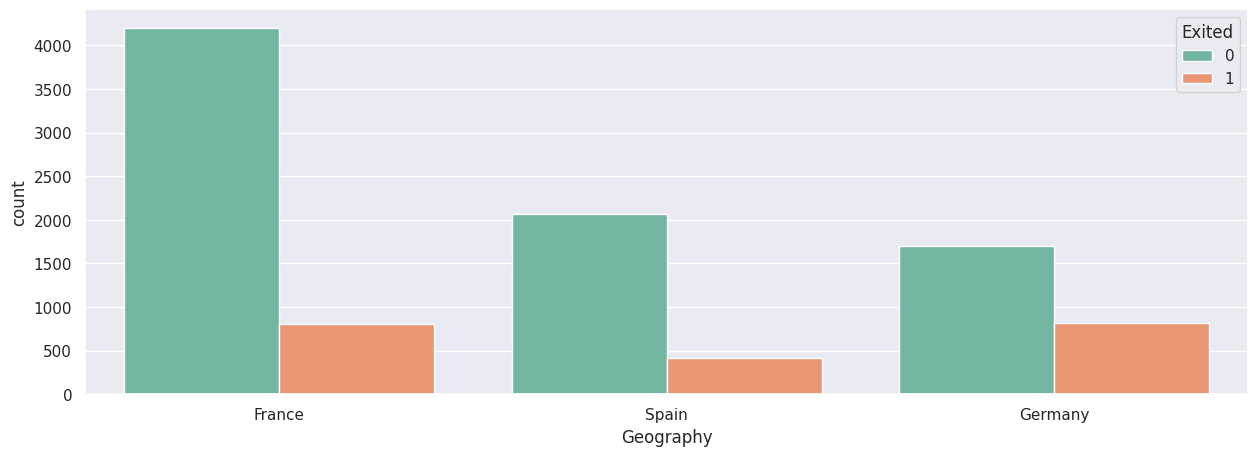






        Exited  churned  stayed   %churned    %stayed
Gender                                               
Female    4543     1139    3404  25.071539  74.928461
Male      5457      898    4559  16.455928  83.544072


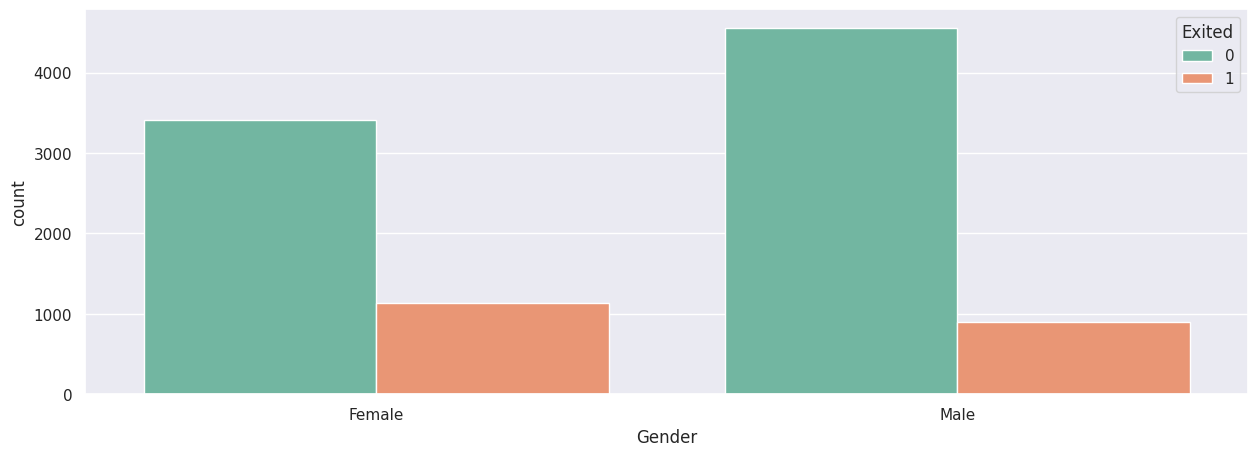






        Exited  churned  stayed   %churned    %stayed
Tenure                                               
0          413       95     318  23.002421  76.997579
1         1035      232     803  22.415459  77.584541
2         1048      201     847  19.179389  80.820611
3         1009      213     796  21.110010  78.889990
4          989      203     786  20.525784  79.474216
5         1012      209     803  20.652174  79.347826
6          967      196     771  20.268873  79.731127
7         1028      177     851  17.217899  82.782101
8         1025      197     828  19.219512  80.780488
9          984      213     771  21.646341  78.353659
10         490      101     389  20.612245  79.387755


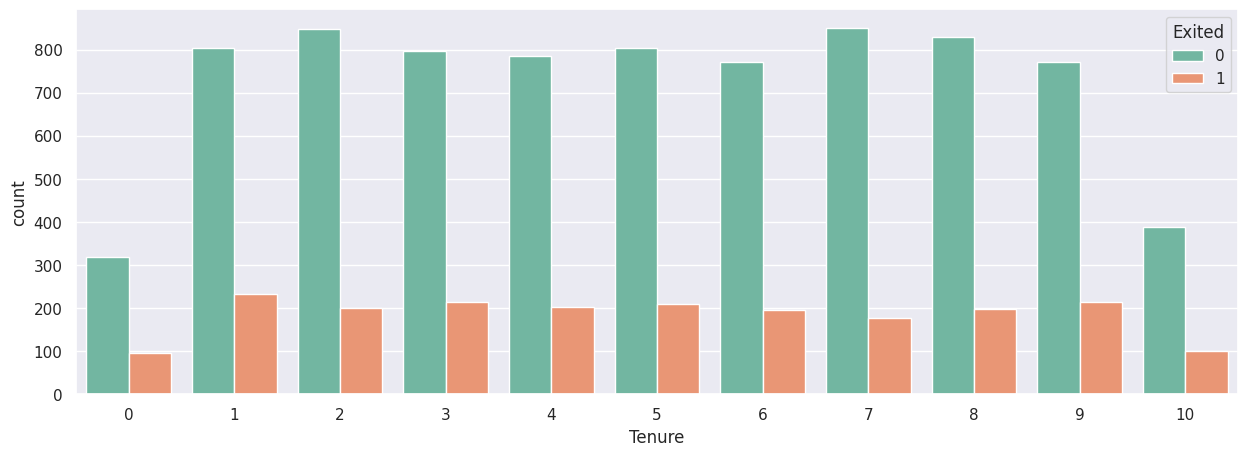






               Exited  churned  stayed    %churned    %stayed
NumOfProducts                                                
1                5084     1409  3675.0   27.714398  72.285602
2                4590      348  4242.0    7.581699  92.418301
3                 266      220    46.0   82.706767  17.293233
4                  60       60     NaN  100.000000        NaN


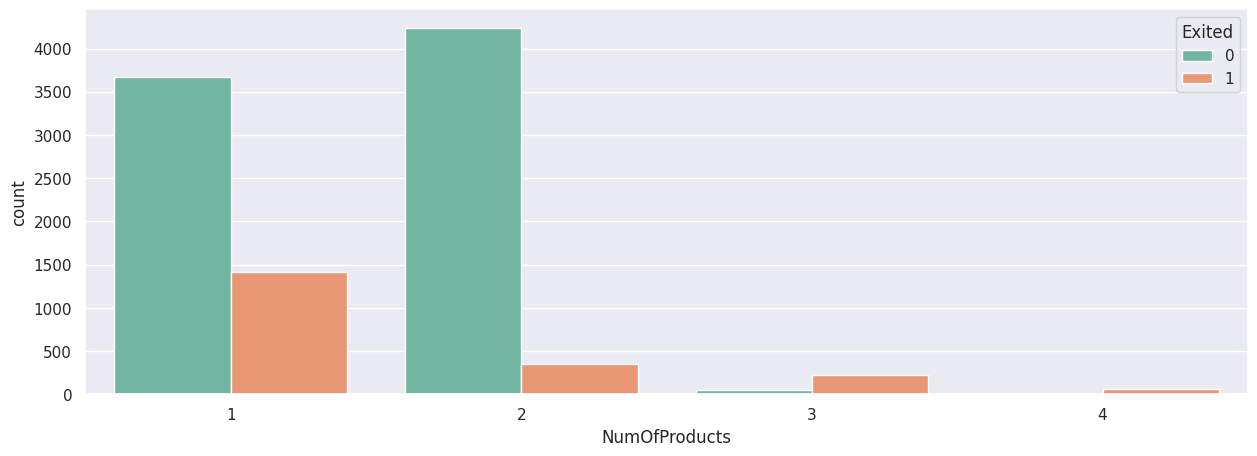






           Exited  churned  stayed   %churned    %stayed
HasCrCard                                               
0            2945      613    2332  20.814941  79.185059
1            7055     1424    5631  20.184266  79.815734


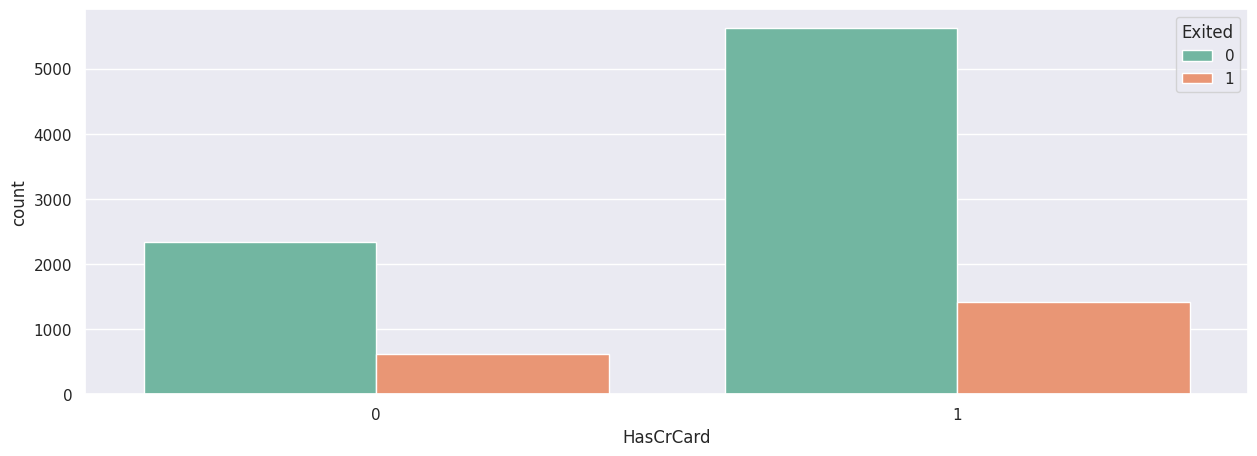






                Exited  churned  stayed   %churned    %stayed
IsActiveMember                                               
0                 4849     1302    3547  26.850897  73.149103
1                 5151      735    4416  14.269074  85.730926


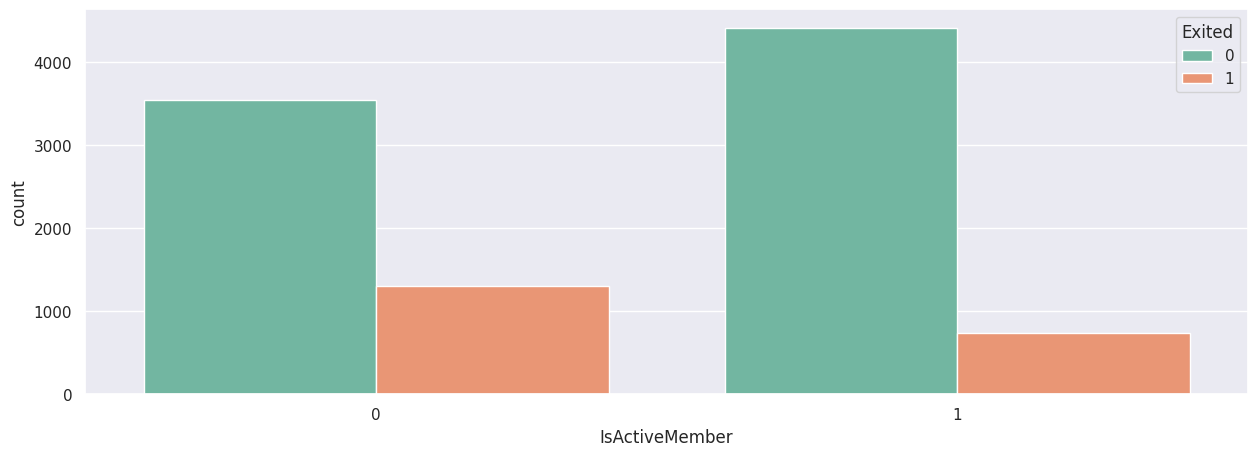






        Exited  churned  stayed  %churned  %stayed
Exited                                            
0         7963      NaN  7963.0       NaN    100.0
1         2037   2037.0     NaN     100.0      NaN


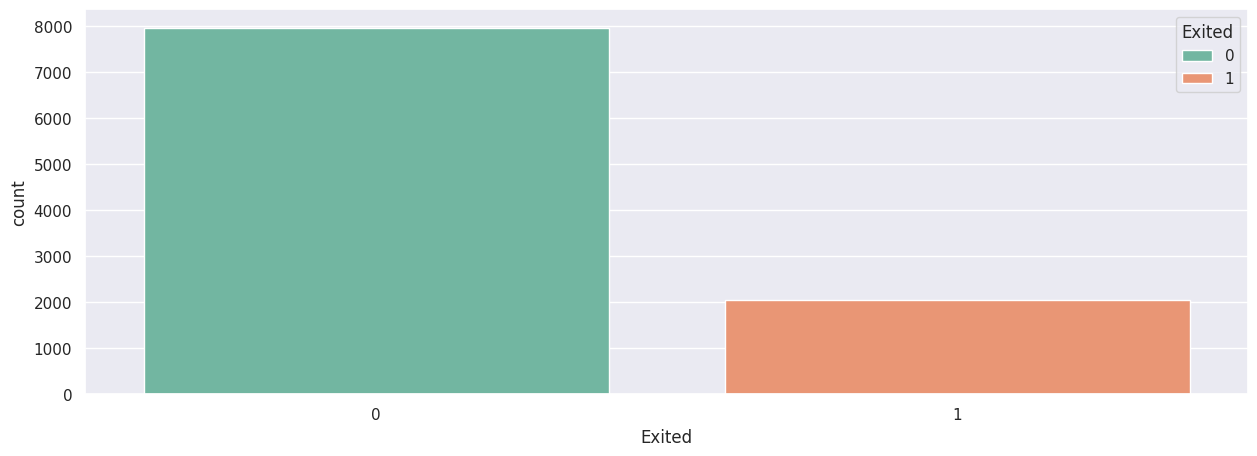






           Exited  churned  stayed   %churned    %stayed
Age_Group                                               
18-25         457       40     417   8.752735  91.247265
26-35        3222      250    2972   7.759156  92.240844
36-45        3981      703    3278  17.658880  82.341120
46-55        1458      702     756  48.148148  51.851852
56-65         600      299     301  49.833333  50.166667
65+           282       43     239  15.248227  84.751773


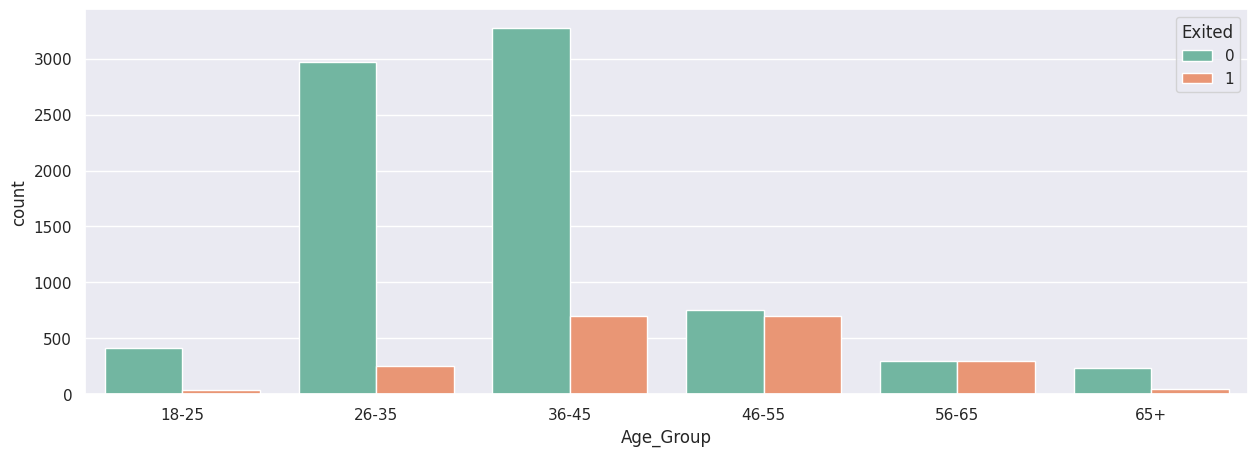






               Exited  churned  stayed   %churned    %stayed
Balance_Group                                               
0-50000          3692      526    3166  14.247021  85.752979
50001-100000     1509      300    1209  19.880716  80.119284
100001-150000    3830      987    2843  25.770235  74.229765
150001-200000     935      205     730  21.925134  78.074866
200001-250000      33       18      15  54.545455  45.454545


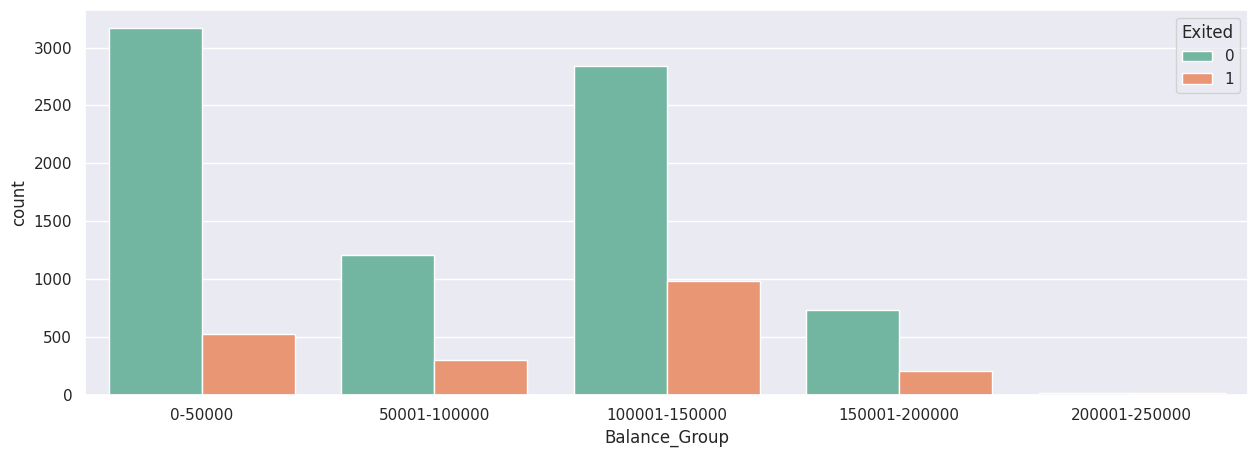






                   Exited  churned  stayed   %churned    %stayed
CreditScore_Group                                               
400-500               613      131     482  21.370310  78.629690
501-600              2402      510    1892  21.232306  78.767694
601-700              3818      753    3065  19.722368  80.277632
701-800              2493      496    1997  19.895708  80.104292
800+                  655      128     527  19.541985  80.458015


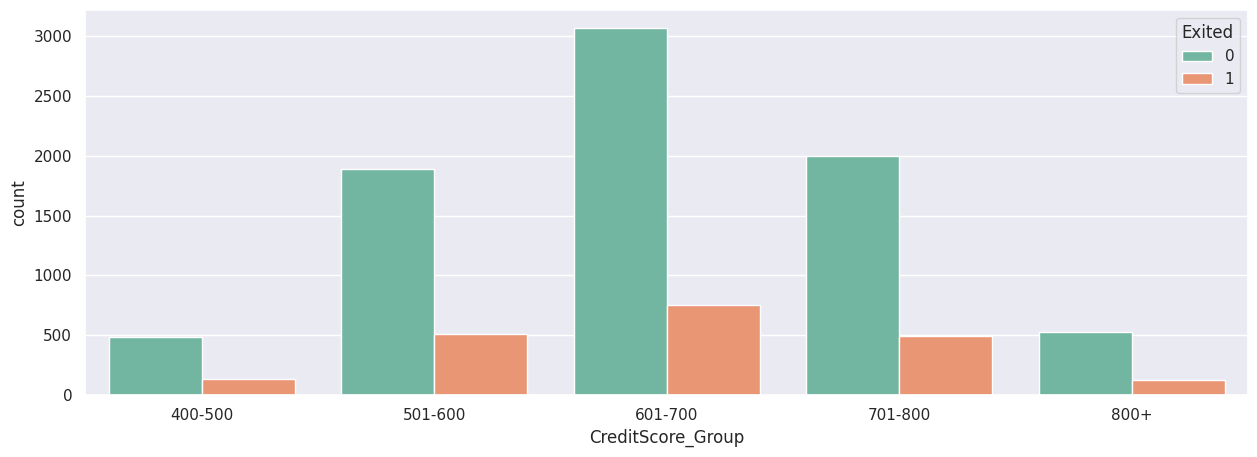






                       Exited  churned  stayed   %churned    %stayed
EstimatedSalary_Group                                               
0-25000                  1217      242     975  19.884963  80.115037
25001-50000              1236      247     989  19.983819  80.016181
50001-75000              1269      266    1003  20.961387  79.038613
75001-100000             1268      238    1030  18.769716  81.230284
100001-125000            1276      256    1020  20.062696  79.937304
125001-150000            1279      261    1018  20.406568  79.593432
150001-175000            1195      254     941  21.255230  78.744770
175001-200000            1260      273     987  21.666667  78.333333


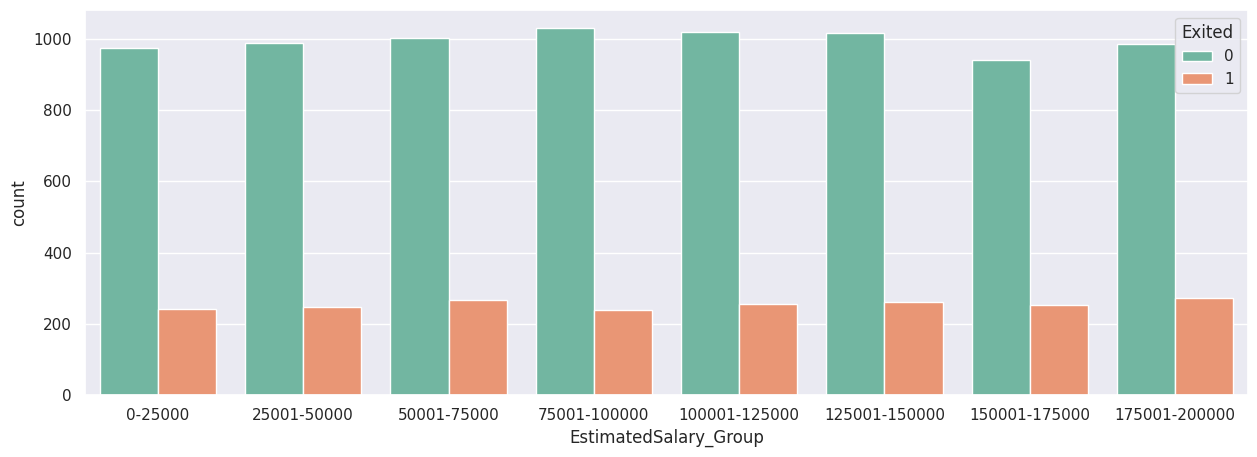

In [16]:
for i in df.columns:
  a=pd.DataFrame(df.groupby(df[i])['Exited'].count())
  a['churned']=df[df['Exited']==1].groupby(df[i])['Exited'].count()
  a['stayed']=df[df['Exited']==0].groupby(df[i])['Exited'].count()
  a['%churned']=(a['churned']/a['Exited'])*100
  a['%stayed']=(a['stayed']/a['Exited'])*100
  print(a)
  plt.figure(figsize=(15,5))
  sns.countplot(x=i,hue='Exited',data=df,palette='Set2')
  plt.show()
  print()
  print('\n\n\n')

In [17]:
'''Geography:
- People from Germany left the bank.
- Germany has exit percentage more i.e 32%.

Gender:
- Female customers has exited the most.
- They have a exit percentage of 25%.

Tenure:
- Tenure of zero years has exit percetage more.
- But the number exited are more in 9 years of Tenure.

NumOfProducts:
- Customers having 4 NumofProducts have 100% exit.
- But people with 1 NumOfProducts has left the bank most.

HasCrCard:
- Customers having no credit card has more percentage of exit.
- But people with credit card has left the bank most.

IsActiveMember:
- Inactive members has exited the most.

Age_Group:
- Customers having CreditScore between 56-65 has more percentage of exit.
- But people with CreditScore between 36-45 has left the bank most.

Balance_Group:
- Customers having Balance between 200001-250000 has more percentage of exit.
- But people with Balance between 100001-150000 has left the bank most.

CreditScore_Group:
- Customers having CreditScore between 400-500 has more percentage of exit.
- But people with CreditScore between 601-700 has left the bank most.

EstimatedSalary_Group:
- Customers having EstimatedSalary between 50001-75000 has more percentage of exit.
- But people with EstimatedSalary between 175001-200000 has left the bank most.
'''

'Geography:\n- People from Germany left the bank.\n- Germany has exit percentage more i.e 32%.\n\nGender:\n- Female customers has exited the most.\n- They have a exit percentage of 25%.\n\nTenure:\n- Tenure of zero years has exit percetage more.\n- But the number exited are more in 9 years of Tenure.\n\nNumOfProducts:\n- Customers having 4 NumofProducts have 100% exit.\n- But people with 1 NumOfProducts has left the bank most.\n\nHasCrCard:\n- Customers having no credit card has more percentage of exit.\n- But people with credit card has left the bank most.\n\nIsActiveMember:\n- Inactive members has exited the most.\n\nAge_Group:\n- Customers having CreditScore between 56-65 has more percentage of exit.\n- But people with CreditScore between 36-45 has left the bank most.\n\nBalance_Group:\n- Customers having Balance between 200001-250000 has more percentage of exit.\n- But people with Balance between 100001-150000 has left the bank most.\n\nCreditScore_Group:\n- Customers having Credit

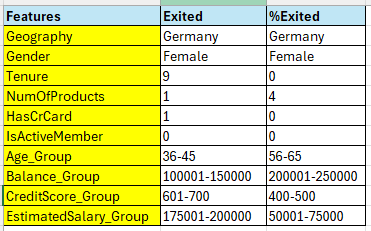

In [18]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
object_cols=df.select_dtypes(include=['object','category']).columns
for cols in object_cols:
  df[cols]=le.fit_transform(df[cols])
df.head()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Age_Group,Balance_Group,CreditScore_Group,EstimatedSalary_Group
0,0,0,2,1,1,1,1,2,0,2,1
1,2,0,1,1,0,1,0,2,4,2,1
2,0,0,8,3,1,0,1,2,2,1,1
3,0,0,1,2,0,0,0,2,0,2,7
4,2,0,2,1,1,1,0,2,1,4,7


In [19]:
#Summarize Numerical Features
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())


Descriptive Statistics for Numerical Features:
          Geography        Gender        Tenure  NumOfProducts    HasCrCard  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.00000   
mean       0.746300      0.545700      5.012800       1.530200      0.70550   
std        0.827529      0.497932      2.892174       0.581654      0.45584   
min        0.000000      0.000000      0.000000       1.000000      0.00000   
25%        0.000000      0.000000      3.000000       1.000000      0.00000   
50%        0.000000      1.000000      5.000000       1.000000      1.00000   
75%        1.000000      1.000000      7.000000       2.000000      1.00000   
max        2.000000      1.000000     10.000000       4.000000      1.00000   

       IsActiveMember        Exited     Age_Group  Balance_Group  \
count    10000.000000  10000.000000  10000.000000   10000.000000   
mean         0.515100      0.203700      1.936800       1.184000   
std          0.499797      0.402769 

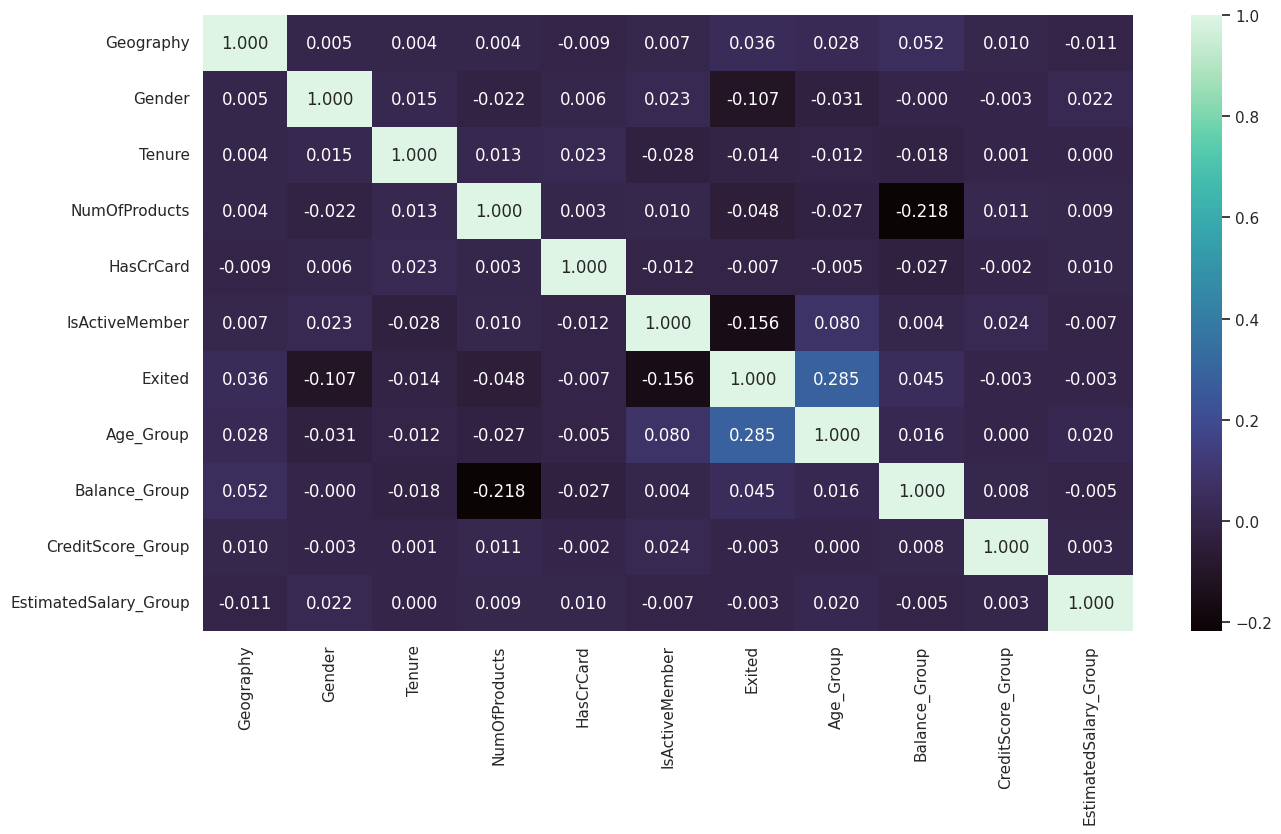

In [20]:
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='mako',fmt='.3f')
plt.show()

In [21]:
# Spliting independent and dependent variables
x=df.drop(columns=['Exited'],axis=1)
y=df['Exited']

In [22]:
print(x.shape,'  ',y.shape)

(10000, 10)    (10000,)


In [23]:
# checking for classs imbalance
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [24]:
#importing libabry to split the original dataset into train and test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)

In [25]:
print('Train dataset size: ',x_train.shape)
print('Test dataset size: ',x_test.shape)

Train dataset size:  (8000, 10)
Test dataset size:  (2000, 10)


In [26]:
# scaling all the independent variables using Standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [27]:
x_test_scaled

array([[-0.89863152,  0.92435245, -1.38960245, ...,  2.11448921,
        -0.01697641,  1.08755457],
       [ 1.51948223,  0.92435245, -1.73637453, ..., -0.13029077,
         0.97434697,  0.21384132],
       [ 1.51948223, -1.08183843,  0.34425799, ...,  2.11448921,
        -0.01697641, -1.53358518],
       ...,
       [-0.89863152,  0.92435245, -1.38960245, ..., -0.13029077,
         0.97434697, -1.09672855],
       [-0.89863152,  0.92435245, -1.38960245, ..., -0.13029077,
        -1.00829979, -1.09672855],
       [-0.89863152, -1.08183843, -0.34928618, ..., -0.87855077,
        -0.01697641,  1.52441119]])

In [28]:
def evaluation(model,y_train_pred,y_train,y_test_pred,y_test):

  Tr_acc=accuracy_score(y_train_pred,y_train)
  Te_acc=accuracy_score(y_test_pred,y_test)

  if Tr_acc-Te_acc>0.10:
    Tr_acc=overfit(model,y_train_pred,y_train)

  print(f'Train accuracy: {Tr_acc}')
  print(f'Test accuracy: {Te_acc}')
  print('\n')
  print(classification_report(y_test_pred,y_test))
  print(classification_report(y_train_pred,y_train))
  print(classification_report(y_test_pred,y_test))
  print('\n')
  plt.figure(figsize=(10,2))
  plt.subplot(1, 3, 1)
  sns.heatmap(confusion_matrix(y_train_pred,y_train),annot=True,fmt='.2f',cmap='Oranges')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix (Training)')
  plt.subplot(1, 3, 3)
  sns.heatmap(confusion_matrix(y_test_pred,y_test),annot=True,fmt='.2f',cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix (Test)')
  plt.show()
  print('\n\n\n\n')
  return Tr_acc,Te_acc


#overfitting issue using Cross Validation technique
def overfit(model,y_train_pred,y_train):
  accuracy = cross_val_score(model,x_train_scaled,y_train,cv=10)
  return accuracy.mean()


In [29]:
modelsdict = {'Logistic Regression':LogisticRegression() , 'Decision Tree':DecisionTreeClassifier(), 'Bagging':BaggingClassifier() ,
              'AdaBoost':AdaBoostClassifier() , 'Gradient Boosting':GradientBoostingClassifier() , 'XGBoost':XGBClassifier(),
              'Random Forest':RandomForestClassifier(),'Gaussian Naive Bayes':GaussianNB(),'Bernoulli Naive Bayes':BernoulliNB()}
models=['Logistic Regression', 'Decision Tree', 'Bagging',
              'AdaBoost', 'Gradient Boosting', 'XGBoost',
              'Random Forest','Gaussian NB','Bernoulli NB','Pruned DTree', 'Tuned Random Forest', 'KNN','SVC']
train_accuracy = []

test_accuracy = []

models_roc_auc_score=[]

models_roc_auc_curve=[]

In [30]:
def model_building(modelsdict):
  for name,ml_model in modelsdict.items():
    model=ml_model
    model.fit(x_train_scaled,y_train)
    y_train_pred=model.predict(x_train_scaled)
    y_test_pred=model.predict(x_test_scaled)
    print(f'Model name: {name}')
    print('\n\n')
    train,test=evaluation(model,y_train_pred,y_train,y_test_pred,y_test)
    train_accuracy.append(train)
    test_accuracy.append(test)
    models_roc_auc_score.append(roc_auc_score(y_test , y_test_pred))
    models_roc_auc_curve.append([roc_curve(y_test , y_test_pred)])

Model name: Logistic Regression



Train accuracy: 0.811875
Test accuracy: 0.806


              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1887
           1       0.16      0.58      0.25       113

    accuracy                           0.81      2000
   macro avg       0.57      0.70      0.57      2000
weighted avg       0.92      0.81      0.85      2000

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7503
           1       0.19      0.63      0.29       497

    accuracy                           0.81      8000
   macro avg       0.58      0.72      0.59      8000
weighted avg       0.92      0.81      0.85      8000

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1887
           1       0.16      0.58      0.25       113

    accuracy                           0.81      2000
   macro avg       0.57      0.70      0.57  

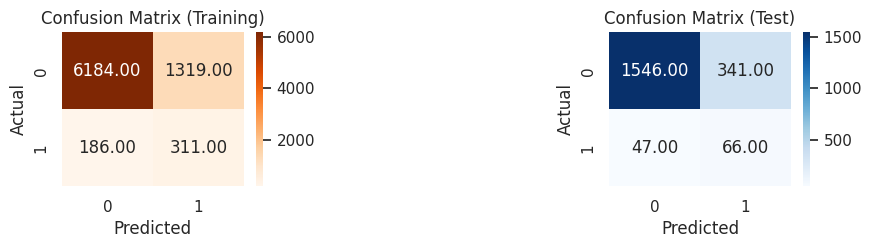






Model name: Decision Tree



Train accuracy: 0.792
Test accuracy: 0.7845


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1566
           1       0.50      0.47      0.49       434

    accuracy                           0.78      2000
   macro avg       0.68      0.67      0.68      2000
weighted avg       0.78      0.78      0.78      2000

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6426
           1       0.97      1.00      0.98      1574

    accuracy                           0.99      8000
   macro avg       0.98      1.00      0.99      8000
weighted avg       0.99      0.99      0.99      8000

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1566
           1       0.50      0.47      0.49       434

    accuracy                           0.78      2000
   macro avg       0.68      0.67      0.68     

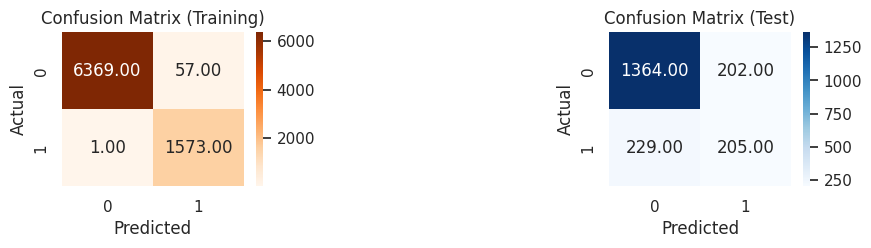






Model name: Bagging



Train accuracy: 0.8400000000000001
Test accuracy: 0.829


              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1711
           1       0.43      0.61      0.51       289

    accuracy                           0.83      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.86      0.83      0.84      2000

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6502
           1       0.91      0.99      0.94      1498

    accuracy                           0.98      8000
   macro avg       0.95      0.98      0.97      8000
weighted avg       0.98      0.98      0.98      8000

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1711
           1       0.43      0.61      0.51       289

    accuracy                           0.83      2000
   macro avg       0.68      0.74      0.7

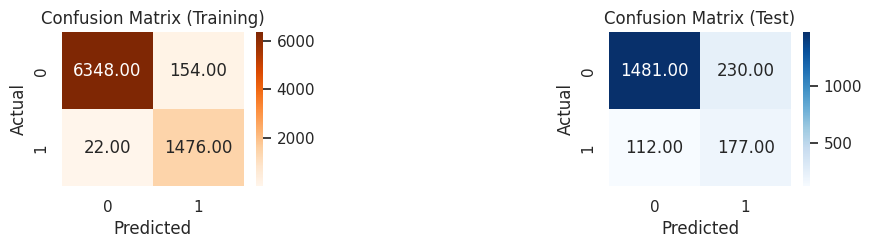






Model name: AdaBoost



Train accuracy: 0.85225
Test accuracy: 0.8485


              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1806
           1       0.37      0.77      0.50       194

    accuracy                           0.85      2000
   macro avg       0.67      0.81      0.70      2000
weighted avg       0.91      0.85      0.87      2000

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      7086
           1       0.42      0.75      0.54       914

    accuracy                           0.85      8000
   macro avg       0.69      0.81      0.72      8000
weighted avg       0.90      0.85      0.87      8000

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1806
           1       0.37      0.77      0.50       194

    accuracy                           0.85      2000
   macro avg       0.67      0.81      0.70      20

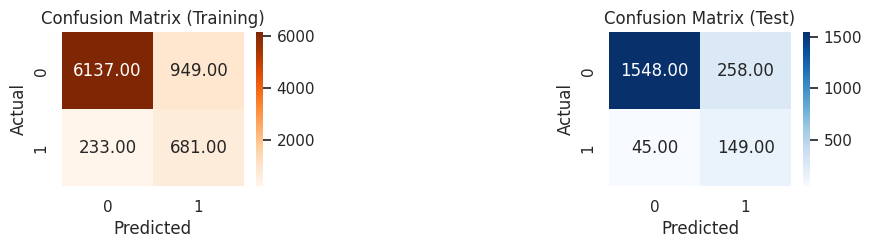






Model name: Gradient Boosting



Train accuracy: 0.86525
Test accuracy: 0.851


              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1793
           1       0.39      0.76      0.51       207

    accuracy                           0.85      2000
   macro avg       0.68      0.81      0.71      2000
weighted avg       0.91      0.85      0.87      2000

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7062
           1       0.46      0.79      0.58       938

    accuracy                           0.87      8000
   macro avg       0.71      0.83      0.75      8000
weighted avg       0.91      0.87      0.88      8000

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1793
           1       0.39      0.76      0.51       207

    accuracy                           0.85      2000
   macro avg       0.68      0.81      0.71

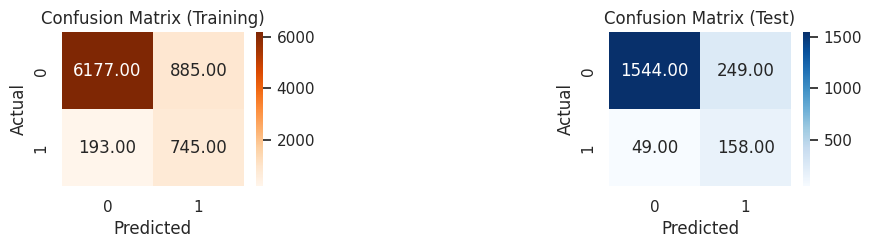






Model name: XGBoost



Train accuracy: 0.921
Test accuracy: 0.8425


              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1740
           1       0.43      0.68      0.53       260

    accuracy                           0.84      2000
   macro avg       0.69      0.77      0.72      2000
weighted avg       0.88      0.84      0.86      2000

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      6784
           1       0.68      0.91      0.78      1216

    accuracy                           0.92      8000
   macro avg       0.83      0.92      0.86      8000
weighted avg       0.94      0.92      0.93      8000

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1740
           1       0.43      0.68      0.53       260

    accuracy                           0.84      2000
   macro avg       0.69      0.77      0.72      2000


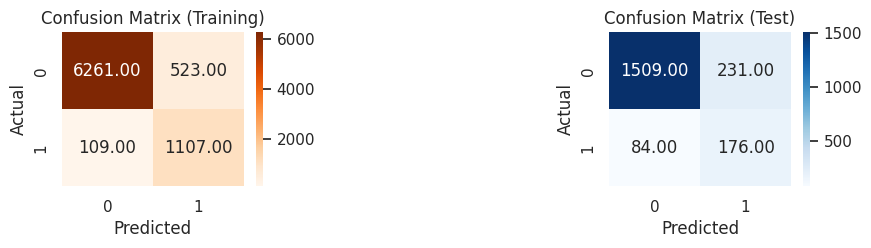






Model name: Random Forest



Train accuracy: 0.8532500000000001
Test accuracy: 0.8405


              precision    recall  f1-score   support

           0       0.95      0.87      0.90      1742
           1       0.43      0.67      0.52       258

    accuracy                           0.84      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.88      0.84      0.85      2000

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6394
           1       0.97      0.99      0.98      1606

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000

              precision    recall  f1-score   support

           0       0.95      0.87      0.90      1742
           1       0.43      0.67      0.52       258

    accuracy                           0.84      2000
   macro avg       0.69      0.77  

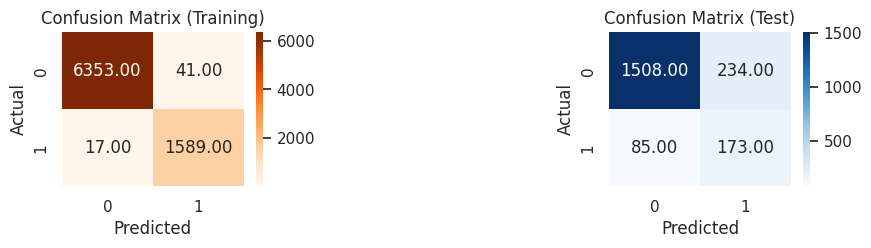






Model name: Gaussian Naive Bayes



Train accuracy: 0.8295
Test accuracy: 0.819


              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1883
           1       0.20      0.69      0.31       117

    accuracy                           0.82      2000
   macro avg       0.59      0.76      0.60      2000
weighted avg       0.93      0.82      0.86      2000

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7500
           1       0.23      0.77      0.36       500

    accuracy                           0.83      8000
   macro avg       0.61      0.80      0.63      8000
weighted avg       0.93      0.83      0.87      8000

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1883
           1       0.20      0.69      0.31       117

    accuracy                           0.82      2000
   macro avg       0.59      0.76      0.

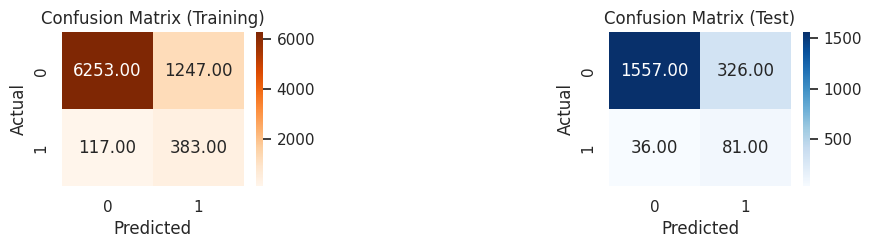






Model name: Bernoulli Naive Bayes



Train accuracy: 0.803125
Test accuracy: 0.799


              precision    recall  f1-score   support

           0       0.97      0.81      0.89      1915
           1       0.11      0.53      0.18        85

    accuracy                           0.80      2000
   macro avg       0.54      0.67      0.53      2000
weighted avg       0.94      0.80      0.86      2000

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7631
           1       0.13      0.57      0.21       369

    accuracy                           0.80      8000
   macro avg       0.55      0.69      0.55      8000
weighted avg       0.94      0.80      0.86      8000

              precision    recall  f1-score   support

           0       0.97      0.81      0.89      1915
           1       0.11      0.53      0.18        85

    accuracy                           0.80      2000
   macro avg       0.54      0.67     

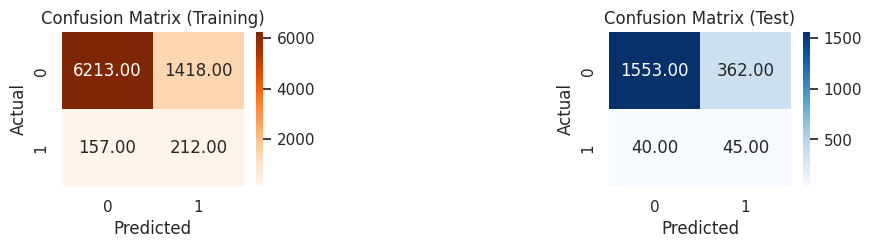

In [31]:
model_building(modelsdict)

In [32]:
mod=modelsdict.keys()
all_mod=pd.DataFrame([],columns=['Model Name','Train Accuracy','Test Accuracy'])
all_mod['Model Name']=mod
all_mod['Train Accuracy']=train_accuracy
all_mod['Test Accuracy']=test_accuracy
all_mod

,Model Name,Train Accuracy,Test Accuracy
0,Logistic Regression,0.811875,0.8060
1,Decision Tree,0.792000,0.7845
2,Bagging,0.840000,0.8290
3,AdaBoost,0.852250,0.8485
4,Gradient Boosting,0.865250,0.8510
5,XGBoost,0.921000,0.8425
6,Random Forest,0.853250,0.8405
7,Gaussian Naive Bayes,0.829500,0.8190
8,Bernoulli Naive Bayes,0.803125,0.7990


In [33]:
#pd.DataFrame(index=x.columns,data=dt1.feature_importances_,columns=['Feature Importance'])

**HYPERPARAMETER TUNING**

---



In [34]:
# Pruning decision tree
pruned_tree=DecisionTreeClassifier(criterion='gini',max_depth=8)
pruned_tree.fit(x_train_scaled,y_train)
y_train_pt_pred=pruned_tree.predict(x_train_scaled)
y_test_pt_pred=pruned_tree.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_pt_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_pt_pred,y_test)}')

Train accuracy: 0.87325
Test accuracy: 0.85


In [35]:
pruned_tree1=DecisionTreeClassifier(criterion='entropy',max_depth=9)
pruned_tree1.fit(x_train_scaled,y_train)
y_train_pt1_pred=pruned_tree1.predict(x_train_scaled)
y_test_pt1_pred=pruned_tree1.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_pt1_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_pt1_pred,y_test)}')

Train accuracy: 0.876125
Test accuracy: 0.8455


In [36]:
all_mod=pd.concat([pd.DataFrame([['Pruned Decision Tree',accuracy_score(y_train_pt_pred,y_train),accuracy_score(y_test_pt_pred,y_test)]],columns=all_mod.columns),all_mod])

In [37]:
models_roc_auc_score.append(roc_auc_score(y_test , y_test_pt_pred))
models_roc_auc_curve.append([roc_curve(y_test , y_test_pt_pred)])

In [38]:
# Random Forest - Hyperparameter tuning
rf=RandomForestClassifier(random_state=40)

In [39]:
import time
start = time.time()
param_dict = {'max_depth': [8,9,10],
             'bootstrap': [True, False],
             'max_features':['auto','log2','sqrt'],
             'criterion':['gini','entropy']}

cv_rf = GridSearchCV(rf, cv = 10, param_grid = param_dict, n_jobs = 3)

cv_rf.fit(x_train_scaled, y_train)

end = time.time()

print('Time taken to execute: %0.2f'%(end-start))

Time taken to execute: 133.57


In [40]:
print('Best parameter using Grid Search is: \n',cv_rf.best_params_)

Best parameter using Grid Search is: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'}


In [41]:
# OOB Accuracy = model.oob_score_
#OOB Error = (1 - model.oob_score_)

rf.set_params(warm_start = True, oob_score = True)

min_estimators = 10
max_estimators= 350

error_rate = {}

for i in range(min_estimators, max_estimators + 1):

    rf.set_params(n_estimators = i)
    rf.fit(x_train_scaled, y_train)

    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error



In [42]:
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate across various forest sizes')

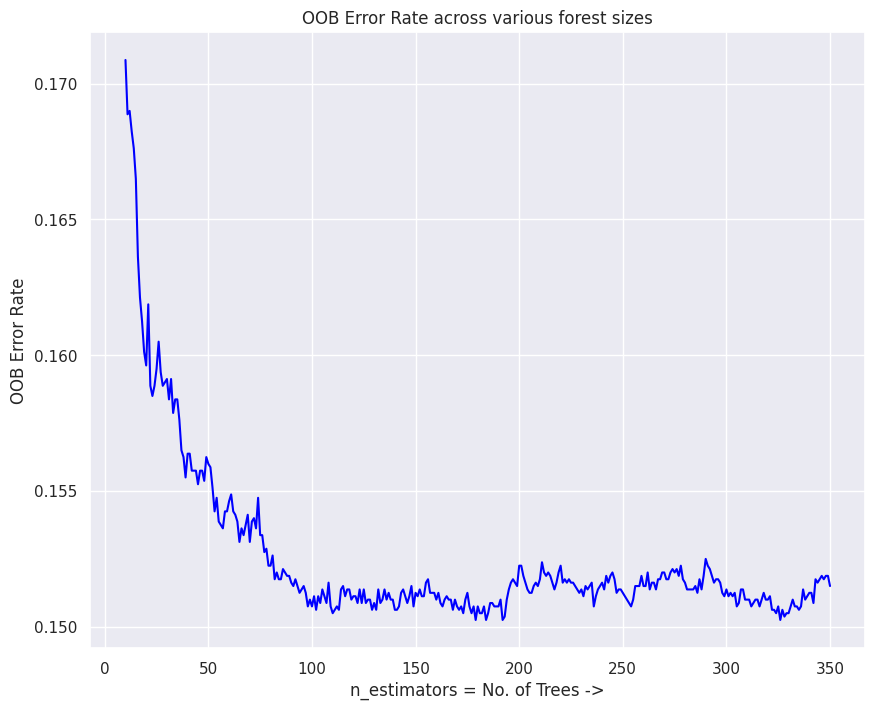

In [43]:
fig, ax = plt.subplots(figsize=(10,8))

oob_series.plot(kind='line', color = 'blue')
plt.xlabel('n_estimators = No. of Trees ->')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate across various forest sizes')

In [44]:
#{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'}

In [45]:
rf.set_params(n_estimators = 180, bootstrap = False,criterion = 'gini', max_depth= 10, max_features= 'log2', warm_start = False, oob_score= False)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       n_estimators=180, random_state=40)

In [46]:
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       n_estimators=180, random_state=40)

In [47]:
accuracy_train_rf = rf.score(x_train_scaled, y_train)
print(accuracy_train_rf)

0.89125


In [48]:
accuracy_test_rf = rf.score(x_test_scaled, y_test)
print(accuracy_test_rf)

0.849


In [49]:
all_mod=pd.concat([pd.DataFrame([['Tuned Random Forest',accuracy_train_rf,accuracy_test_rf]],columns=all_mod.columns),all_mod])

In [50]:
y_train_rf_pred=rf.predict(x_train_scaled)
y_test_rf_pred=rf.predict(x_test_scaled)

In [51]:
models_roc_auc_score.append(roc_auc_score(y_test , y_test_rf_pred))
models_roc_auc_curve.append([roc_curve(y_test , y_test_rf_pred)])

In [52]:
importances = rf.feature_importances_
importances

array([0.05063673, 0.02353424, 0.05424354, 0.30506593, 0.01457446,
       0.0879327 , 0.32292858, 0.05343713, 0.04237255, 0.04527415])

In [53]:
feature_names= x_train.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance':importances})
feature_importance = feature_importance.sort_values(by='Importance',ascending = False)

Text(0.5, 1.0, 'Feature Importance')

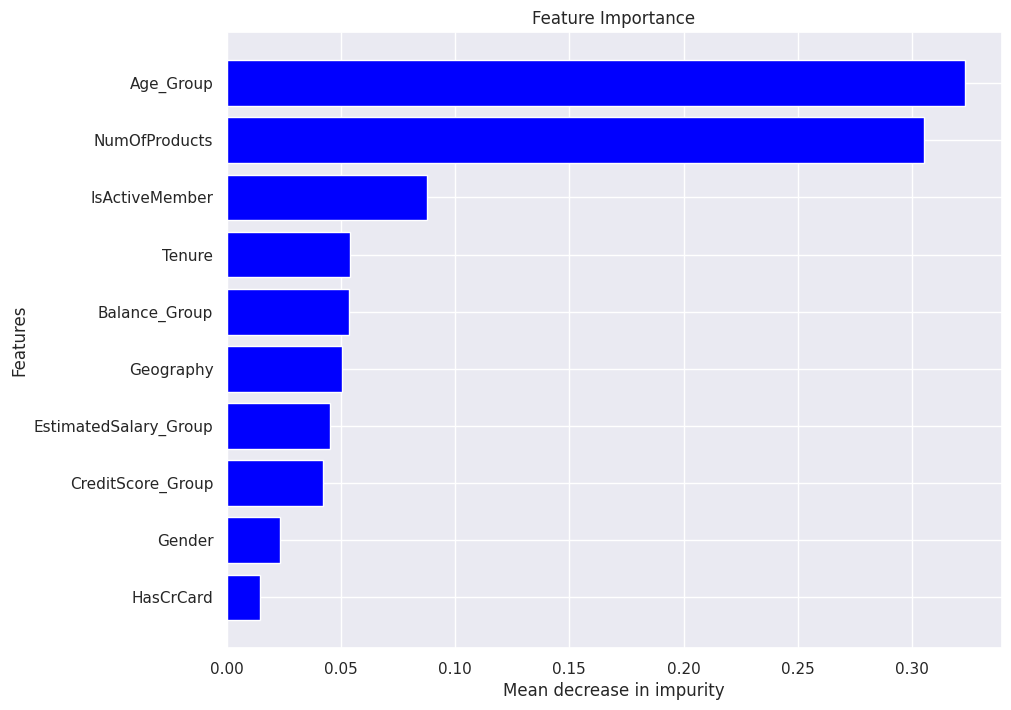

In [54]:
# Plot the feature importance

plt.figure(figsize=(10,8))
plt.barh(feature_importance['Feature'],feature_importance['Importance'], color = 'blue')
plt.gca().invert_yaxis()
plt.xlabel('Mean decrease in impurity')
plt.ylabel('Features')
plt.title('Feature Importance')

In [55]:
# Model : KNN
error_rate=[]
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_scaled,y_train)
  y_train_knn_pred=knn.predict(x_train)
  y_test_knn_pred=knn.predict(x_test)
  error_rate.append(np.mean(y_test_knn_pred!=y_test))
print(error_rate)

[np.float64(0.3105), np.float64(0.235), np.float64(0.2735), np.float64(0.2265), np.float64(0.238), np.float64(0.2155), np.float64(0.2245), np.float64(0.212), np.float64(0.2215), np.float64(0.205), np.float64(0.21), np.float64(0.205), np.float64(0.209), np.float64(0.202), np.float64(0.2025), np.float64(0.1985), np.float64(0.2005), np.float64(0.198), np.float64(0.198), np.float64(0.197), np.float64(0.196), np.float64(0.197), np.float64(0.197), np.float64(0.196), np.float64(0.197), np.float64(0.1975), np.float64(0.2), np.float64(0.202), np.float64(0.201)]


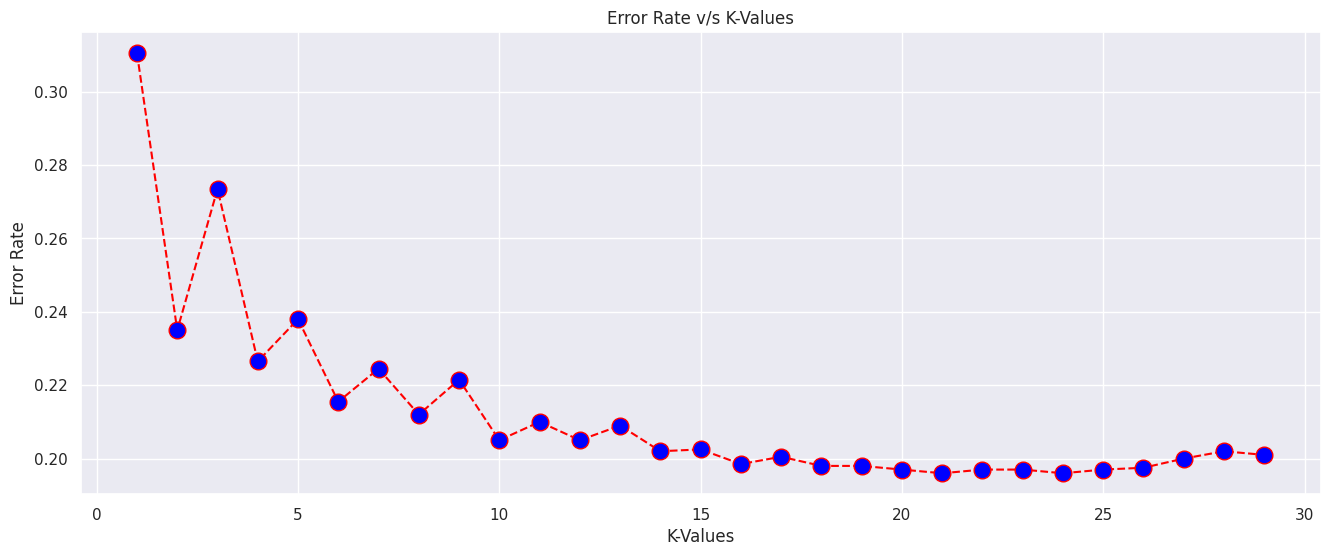

In [56]:
plt.figure(figsize=(16,6))
plt.plot(range(1,30),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=12)
plt.title('Error Rate v/s K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')
plt.show()

In [57]:
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train_scaled,y_train)
y_train_knn_pred=knn.predict(x_train)
y_test_knn_pred=knn.predict(x_test)

In [58]:
all_mod=pd.concat([pd.DataFrame([['KNeighborsClassifier',accuracy_score(y_test_knn_pred,y_test),accuracy_score(y_test_knn_pred,y_test)]],columns=all_mod.columns),all_mod])

In [59]:
models_roc_auc_score.append(roc_auc_score(y_test , y_test_knn_pred))
models_roc_auc_curve.append([roc_curve(y_test , y_test_knn_pred)])

In [60]:
# Kernel - Linear
svc_lr=SVC(kernel='linear')
svc_lr.fit(x_train_scaled,y_train)
y_train_svc_lr_pred=svc_lr.predict(x_train_scaled)
y_test_svc_lr_pred=svc_lr.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_svc_lr_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_svc_lr_pred,y_test)}')

Train accuracy: 0.79625
Test accuracy: 0.7965


In [61]:
# Kernel - Sigmoid
svc_sg=SVC(kernel='sigmoid')
svc_sg.fit(x_train_scaled,y_train)
y_train_svc_sg_pred=svc_sg.predict(x_train_scaled)
y_test_svc_sg_pred=svc_sg.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_svc_sg_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_svc_sg_pred,y_test)}')

Train accuracy: 0.67925
Test accuracy: 0.702


In [62]:
# Kernel - Polynomial
svc_pl=SVC(kernel='poly')
svc_pl.fit(x_train_scaled,y_train)
y_train_svc_pl_pred=svc_pl.predict(x_train_scaled)
y_test_svc_pl_pred=svc_pl.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_svc_pl_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_svc_pl_pred,y_test)}')

Train accuracy: 0.85575
Test accuracy: 0.843


In [63]:
# Kernel - RBF
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(x_train_scaled,y_train)
y_train_svc_rbf_pred=svc_rbf.predict(x_train_scaled)
y_test_svc_rbf_pred=svc_rbf.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_svc_rbf_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_svc_rbf_pred,y_test)}')

Train accuracy: 0.8615
Test accuracy: 0.8465


In [64]:
# Kernel = rbf is giving better accuracy than other kernel. So using it as final model
final_model=SVC(kernel='rbf')
final_model.fit(x_train_scaled,y_train)
y_train_svc_pred=final_model.predict(x_train_scaled)
y_test_svc_pred=final_model.predict(x_test_scaled)
print(f'Train accuracy: {accuracy_score(y_train_svc_pred,y_train)}')
print(f'Test accuracy: {accuracy_score(y_test_svc_pred,y_test)}')

Train accuracy: 0.8615
Test accuracy: 0.8465


In [65]:
all_mod=pd.concat([pd.DataFrame([['Support Vector Classifier',accuracy_score(y_train_svc_pred,y_train),accuracy_score(y_test_svc_pred,y_test)]],columns=all_mod.columns),all_mod])

In [66]:
models_roc_auc_score.append(roc_auc_score(y_test , y_test_svc_pred))
models_roc_auc_curve.append([roc_curve(y_test , y_test_svc_pred)])

In [67]:
all_mod.set_index('Model Name',inplace=True)

Text(0, 0.5, 'Train Accuracy')

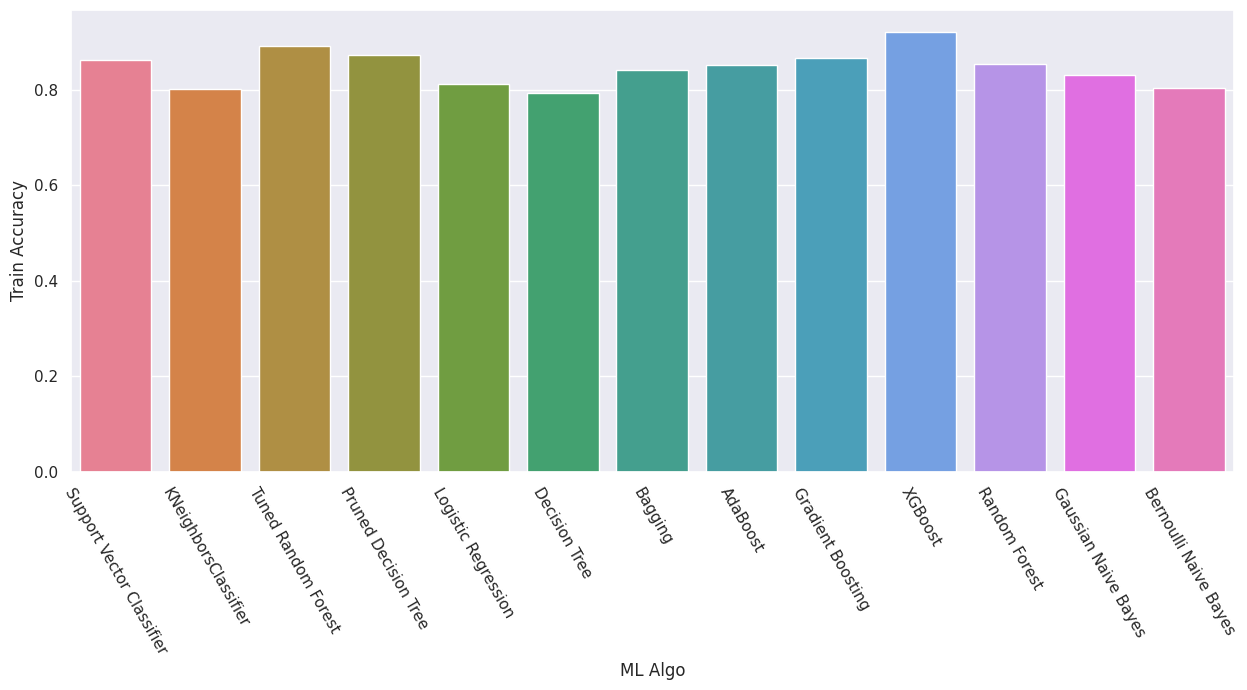

In [68]:
plt.figure(figsize=(15,6))
sns.barplot(x = all_mod.index  , y = 'Train Accuracy' ,hue=all_mod.index , data = all_mod)
plt.xticks(rotation=-60)
plt.xlabel('ML Algo')
plt.ylabel('Train Accuracy')

Text(0, 0.5, 'Test Accuracy')

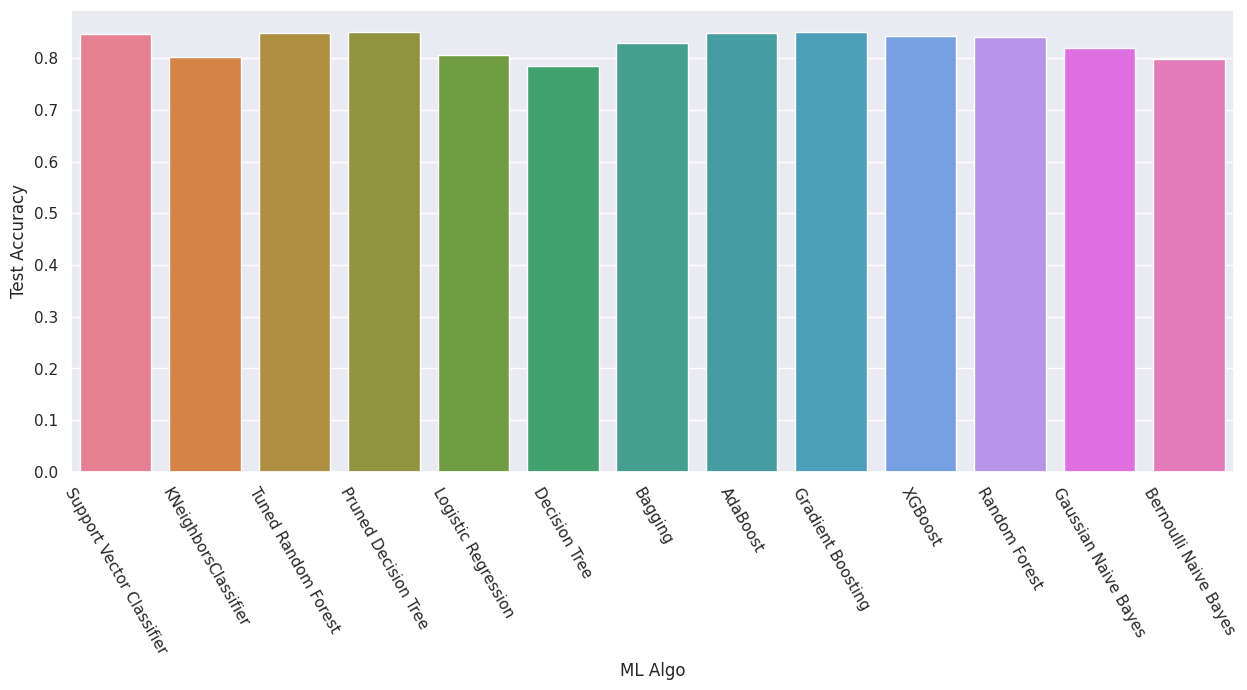

In [69]:
plt.figure(figsize=(15,6))
sns.barplot(x = all_mod.index , y = 'Test Accuracy' ,hue=all_mod.index, data = all_mod)
plt.xticks(rotation=-60)
plt.xlabel('ML Algo')
plt.ylabel('Test Accuracy')

In [70]:
all_mod

,Train Accuracy,Test Accuracy
Model Name,,
Support Vector Classifier,0.861500,0.8465
KNeighborsClassifier,0.801500,0.8015
Tuned Random Forest,0.891250,0.8490
Pruned Decision Tree,0.873250,0.8500
Logistic Regression,0.811875,0.8060
Decision Tree,0.792000,0.7845
Bagging,0.840000,0.8290
AdaBoost,0.852250,0.8485
Gradient Boosting,0.865250,0.8510


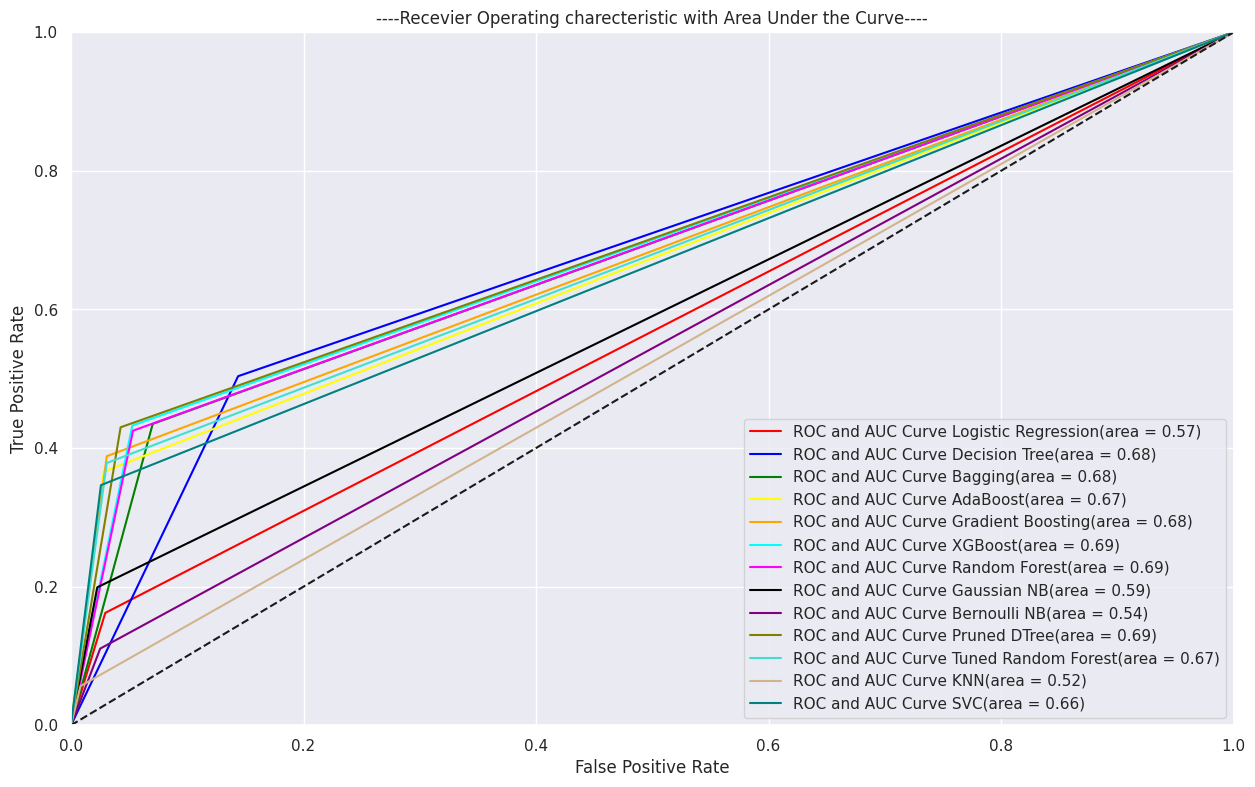

In [71]:
plt.figure(figsize = (15 , 9))
colors=['red','blue','green','yellow','orange','cyan','magenta','black','purple','olive','turquoise','tan','teal']
for i in range(len(models_roc_auc_score)):
  plt.plot(models_roc_auc_curve[i][0][0], models_roc_auc_curve[i][0][1], label = f'ROC and AUC Curve {models[i]}(area = %0.2f)' %models_roc_auc_score[i],color = colors[i])
plt.plot([0,1] , [0,1] , 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('----Recevier Operating charecteristic with Area Under the Curve----')
plt.legend(loc = 'lower right')
plt.show()

In [72]:
#Conclusion: XGBoost is the best performing model for this dataset.